In [2]:
# Установить библиотеку ucimlrepo для загрузки датасета

In [3]:
pip install ucimlrepo

Вариант 3/8:
* Положительный класс – 4
* Отрицательный класс - 1, 2, 3, 5, 6, 7

# Импортировать библиотеки

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler

# Загрузить датасет

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

In [6]:
df = covertype.data.original
df.head(5)

,,,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,...,0,0,0,0,0,0,0,0,0,5


# Предварительная обработка данных

In [7]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Elevation: [ 258  212  268  242  153  300  270  234  240  247  180  371  150   67
   42  120   85   95   60  216  192  124    0   30  323  127  162  182
  210  175  190  134   90  218  277  108  201  382  531  560  418  272
  426  295  543  351  170  309  408  342  400  228  469  330  301  551
  570  658  424  488  285  497  335  350  324  510  384  319  366  484
  458  618  600  553  360  283  579  313  648  759  604  443  474  984
  720  255  603  495  750  997  457  503  870  792  362  815  842  811
  743  391  690  631  931  626  789  516  849  306  659  730  764  612
  481  693  630  297  480  421  752  780  395  361  466  680  256  696
  518  376  390  513  470  641  558  674  379  437  700  451  932  514
  616  638  485  547  433  592  446  564  524  365  467  499  331  402
  430  541  532  591  741  633  511  509  582  540  420  454  722  642
  649  537  417  830  771  702  812  607  691  404  450  577  459  566
  589  573  778  721  525  636  571  799  339  711  534  576  726 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 581012 entries, (2596, 51, 3) to (2383, 165, 13)
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area                     581012 non-null  int64
 11  Soil_Type1                     

У датасета нет пропущенных данных поэтому не нужно обрабатывать данные.

# Разделить данные на features и target

In [10]:
X = df.loc[:,df.columns!='Cover_Type']
y = df.loc[:,df.columns=='Cover_Type']

In [11]:
X.head()

,,,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
2596,51,3,258,0,510,221,232,148,6279,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y.head()

,,,Cover_Type
2596,51,3,5
2590,56,2,5
2804,139,9,2
2785,155,18,2
2595,45,2,5


0 – положительный класс
1 – отрицательный класс

# Заменить значения targets на 2 класса

In [13]:
class_dict = {
    4: 0,
    1: 1,
    2: 1,
    3: 1,
    5: 1,
    6: 1,
    7: 1
}

y['Cover_Type'] = y['Cover_Type'].map(class_dict)

<ipython-input-13-caffa7fc851e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Cover_Type'] = y['Cover_Type'].map(class_dict)


In [14]:
y['Cover_Type'].unique()

array([1, 0])

In [15]:
y = y.squeeze()

In [16]:
y.value_counts()

1    578265
0      2747
Name: Cover_Type, dtype: int64

Тут видно что у класса 1 (отрицательный класс) больше данных чем у класса 0 (положительный класс) поэтому нужно сделать Undersampling чтобы данные равномерны распределены

# UnderSampling

In [17]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X,y)

In [18]:
y_resampled.value_counts()

0    2747
1    2747
Name: Cover_Type, dtype: int64

# Разделить данные на обучающие и тестовые данные

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
print(f"Train size: {len(X_train)}, test size: {len(X_test)}")

Train size: 4395, test size: 1099


# RandomForestClassifier

## Построить и потренировать модель RandomForestClassifier

In [21]:
clf = RandomForestClassifier(max_depth=5, random_state=0)

In [22]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=0)

## Тестировать модель

In [23]:
y_pred = clf.predict(X_test)

## Evaluate performance with accuracy, Confusion Matrix, AUC ROC

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       563
           1       1.00      0.93      0.97       536

    accuracy                           0.97      1099
   macro avg       0.97      0.97      0.97      1099
weighted avg       0.97      0.97      0.97      1099



### Accuracy Score

In [25]:
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred))

RandomForest Accuracy: 0.9672429481346679


### Confusion Matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

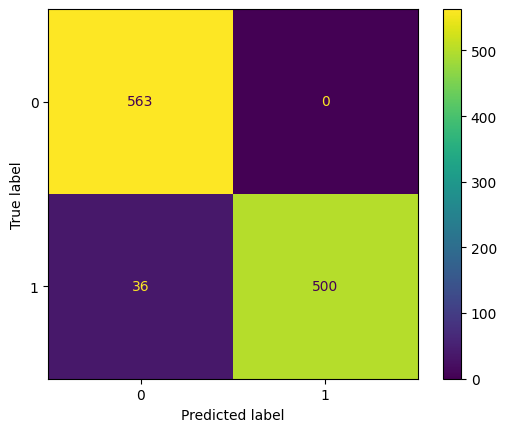

In [28]:
disp.plot()
plt.show()

### AUC ROC

In [29]:
y_score = clf.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

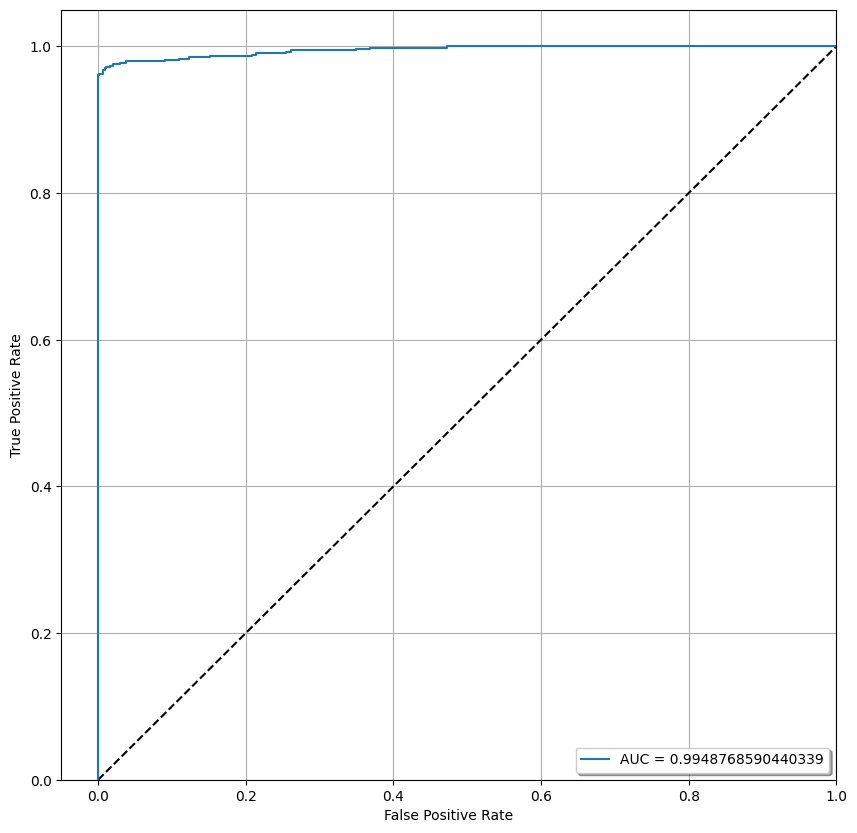

In [30]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))
plt.legend(loc="lower right", shadow=True, fancybox =True)
plt.show()

## Визуализировать значения важности признаков для моделей

In [31]:
feature_importances_rf = clf.feature_importances_
feature_importances_rf_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_rf
})
feature_importances_rf_df = feature_importances_rf_df.sort_values(by='Importance', ascending=False)

In [32]:
print("Top 5 Random Forest Feature Importance")

for i, row in feature_importances_rf_df.head(5).iterrows():
  print(f"{row['Feature']}: {row['Importance']:.3f}")

Top 5 Random Forest Feature Importance
Wilderness_Area: 0.340
Slope: 0.127
Hillshade_Noon: 0.094
Horizontal_Distance_To_Fire_Points: 0.085
Hillshade_9am: 0.083


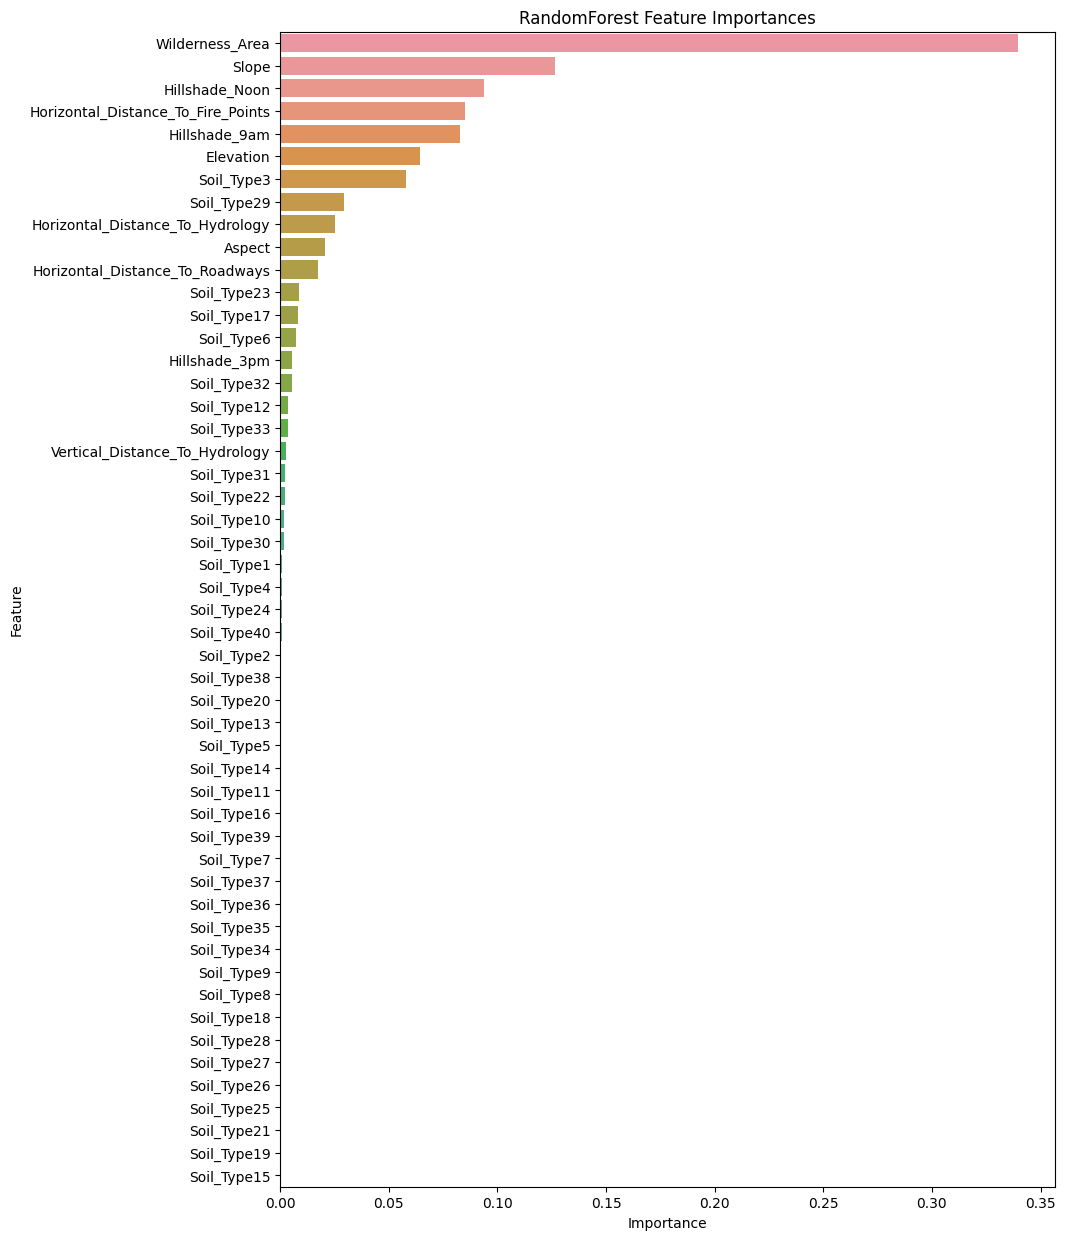

In [33]:
plt.figure(figsize=(10, 15))
sns.barplot(x=feature_importances_rf_df['Importance'], y=feature_importances_rf_df['Feature'])
plt.title('RandomForest Feature Importances')
plt.show()

# DecisionTreeClassifier

## Построить и потренировать модель DecisionTreeClassifier

In [34]:
dt_model = DecisionTreeClassifier(random_state=42)

In [35]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Тестировать модель

In [36]:
y_pred = dt_model.predict(X_test)

## Evaluate performance with accuracy, ConfusionMatrix, AUC ROC

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       563
           1       0.99      0.97      0.98       536

    accuracy                           0.98      1099
   macro avg       0.98      0.98      0.98      1099
weighted avg       0.98      0.98      0.98      1099



### Accuracy Score

In [38]:
print("DecisionTree Accuracy:", accuracy_score(y_test, y_pred))

DecisionTree Accuracy: 0.9827115559599636


### Confusion Matrix

In [39]:
cm = confusion_matrix(y_test, y_pred)

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)

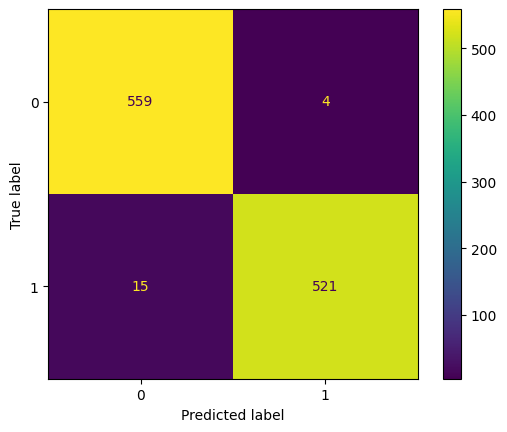

In [41]:
disp.plot()
plt.show()

### AUC ROC

In [42]:
y_score = dt_model.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

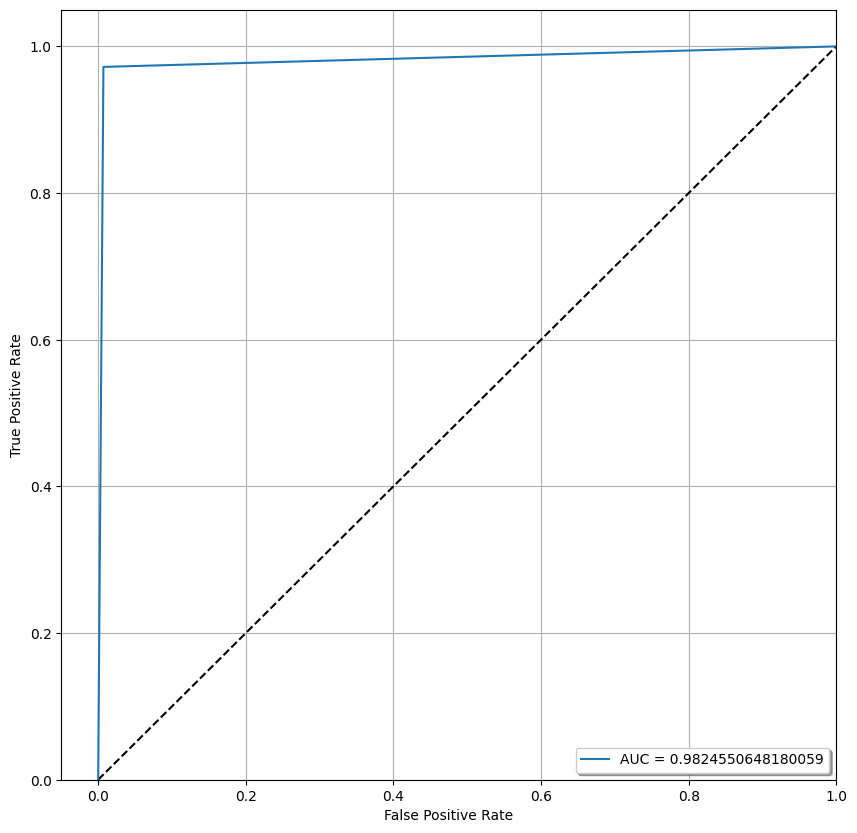

In [43]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))
plt.legend(loc="lower right", shadow=True, fancybox =True)
plt.show()

## Визуализировать значения важности признаков для моделей

In [44]:
feature_importances_dt = dt_model.feature_importances_
feature_importances_dt_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_dt
})
feature_importances_dt_df = feature_importances_dt_df.sort_values(by='Importance', ascending=False)

In [45]:
print("Top 5 Decision Tree Feature Importance")

for i, row in feature_importances_dt_df.head(5).iterrows():
  print(f"{row['Feature']}: {row['Importance']:.3f}")

Top 5 Decision Tree Feature Importance
Wilderness_Area: 0.887
Horizontal_Distance_To_Hydrology: 0.025
Slope: 0.016
Vertical_Distance_To_Hydrology: 0.015
Aspect: 0.013


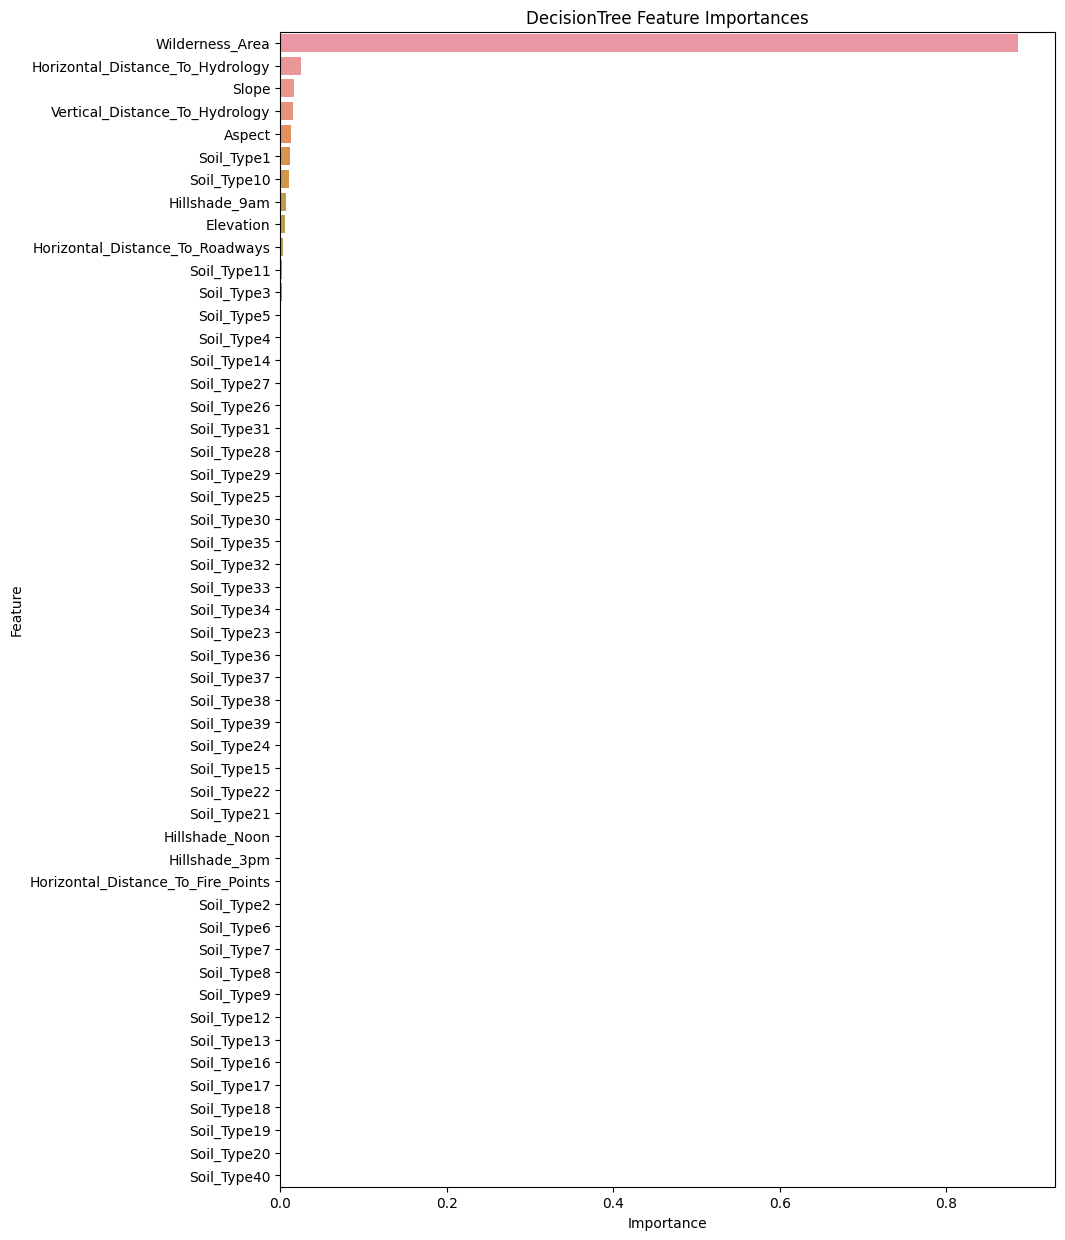

In [46]:
plt.figure(figsize=(10, 15))
sns.barplot(x=feature_importances_dt_df['Importance'], y=feature_importances_dt_df['Feature'])
plt.title('DecisionTree Feature Importances')
plt.show()

# LogisticRegression

## Построить и потренировать модель LogisticRegression

In [47]:
lr_model = LogisticRegression(random_state=42)

In [48]:
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Тестировать модель

In [49]:
y_pred = lr_model.predict(X_test)

## Evaluate performance with accuracy, ConfusionMatrix, AUC ROC

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       563
           1       1.00      0.95      0.97       536

    accuracy                           0.97      1099
   macro avg       0.98      0.97      0.97      1099
weighted avg       0.98      0.97      0.97      1099



### Accuracy Score

In [51]:
print("LogisticRegression Accuracy:", accuracy_score(y_test, y_pred))

LogisticRegression Accuracy: 0.9745222929936306


### Confusion Matrix

In [52]:
cm = confusion_matrix(y_test, y_pred)

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)

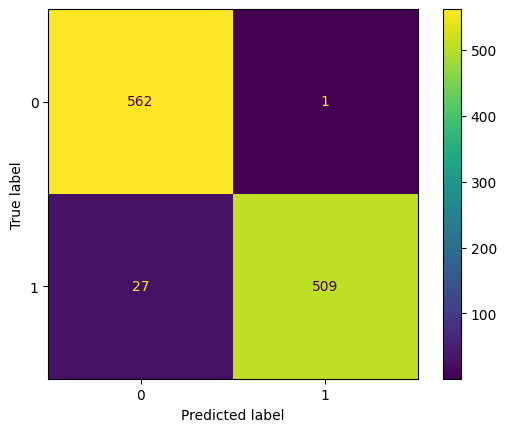

In [54]:
disp.plot()
plt.show()

### AUC ROC

In [55]:
y_score = lr_model.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

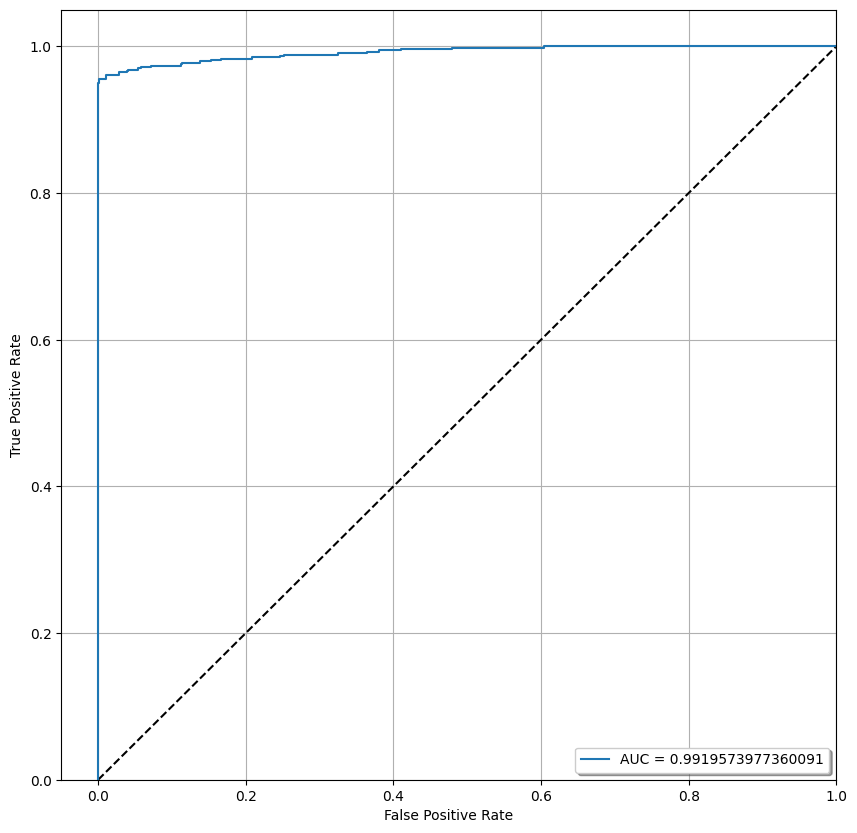

In [56]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))
plt.legend(loc="lower right", shadow=True, fancybox =True)
plt.show()

## Визуализировать значения важности признаков для моделей

In [58]:
feature_importances_lr = np.abs(lr_model.coef_[0])
feature_importances_lr_df = pd.DataFrame({
    'Feature': covertype.variables['name'][:51],
    'Importance': feature_importances_lr
})
feature_importances_lr_df = feature_importances_lr_df.sort_values(by='Importance', ascending=False)

In [62]:
print("Top 5 Logistic Regression Coefficient Importance")

for i, row in feature_importances_lr_df.head(5).iterrows():
  print(f"{row['Feature']}: {row['Importance']:.3f}")

Top 5 Logistic Regression Coefficient Importance
Wilderness_Area: 5.905
Horizontal_Distance_To_Fire_Points: 3.297
Hillshade_Noon: 2.132
Soil_Type17: 1.629
Soil_Type3: 1.476


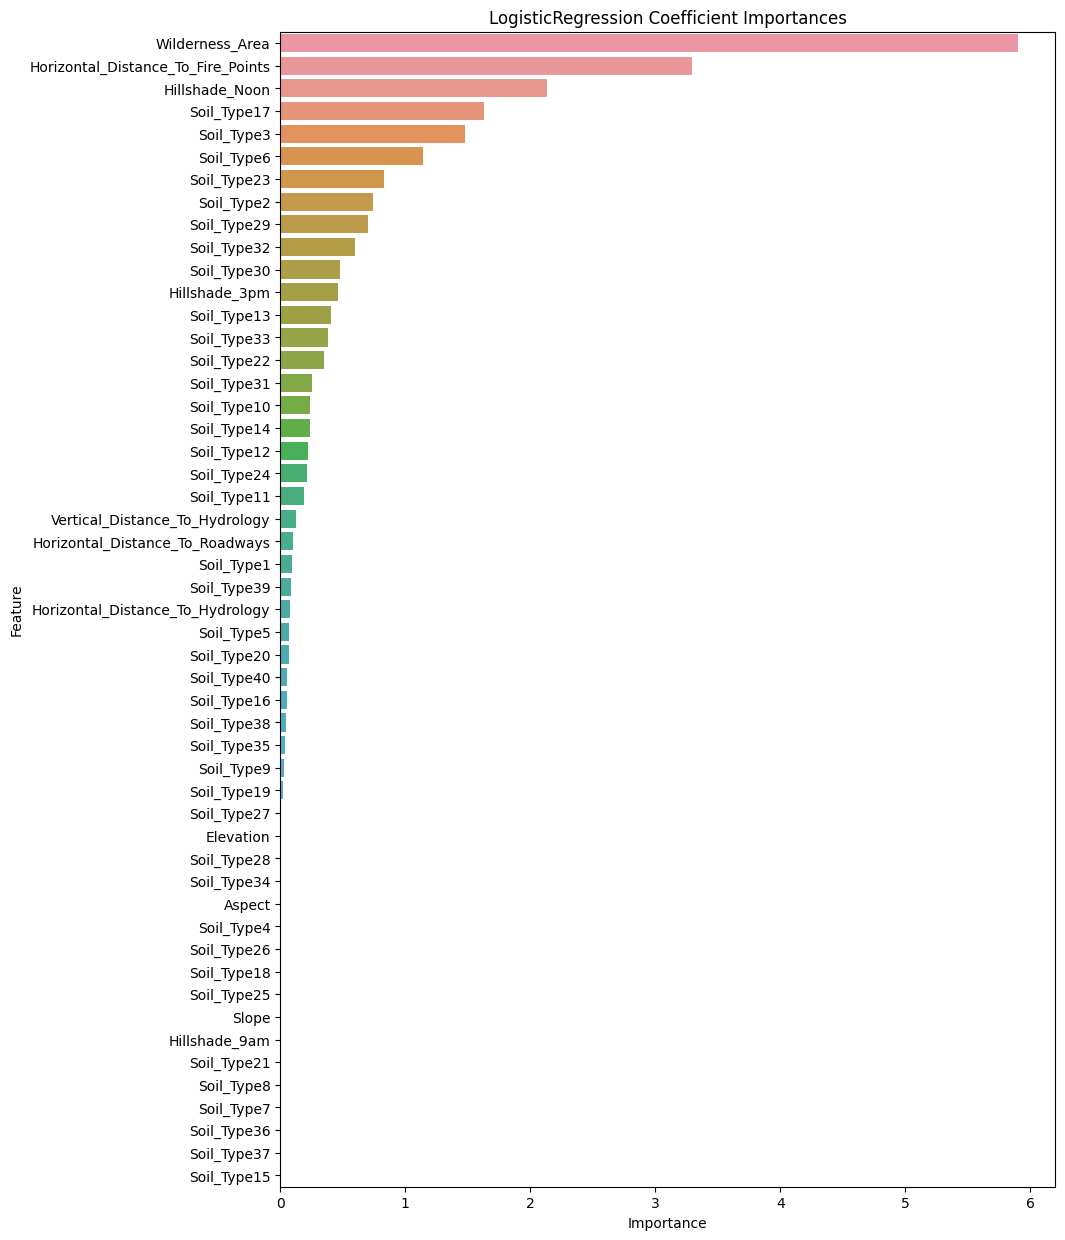

In [63]:
plt.figure(figsize=(10, 15))
sns.barplot(x=feature_importances_lr_df['Importance'], y=feature_importances_lr_df['Feature'])
plt.title('LogisticRegression Coefficient Importances')
plt.show()

# Заключение

## Важности признаков
- Random Forest Classifier:
  - Wilderness_Area
  - Slope
  - Hillshade_Noon
  - Horizontal_Distance_To_Fire_Points
  - Hillshade_9am

- Decision Tree Classifier:
  - Wilderness_Area
  - Horizontal_Distance_To_Hydrology
  - Slope
  - Vertical_Distance_To_Hydrology
  - Aspect

- Logistic Regression:
  - Wilderness_Area
  - Horizontal_Distance_To_Fire_Points
  - Hillshade_Noon
  - Soil_Type17
  - Soil_Type3

## Точности моделей
- Random Forest Classifier: 0.967

- Decision Tree Classifier: 0.983

- Logistic Regression: 0.975


Таким образом можем сделать вывод такой:
  - Для нашего случая, модель Decision Tree Classifier является самой хорошей моделью классификатора по сравнению с другими моделями с точки зрения точности модели.
  - Для всех моделей признак Wilderness_Area является самым хорошим признаком.